### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-06 10:15:02,012	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [2]:
n = 10
popsize = 10
name = 'centered2'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=popsize)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 54 (seed=2943150666, Mon Feb  6 10:15:03 2023)


In [3]:
trainer.train(2000, name)

         iter : 1
    mean_eval : -1622.7398681640625
  median_eval : -930.74951171875
pop_best_eval : -4.3713459968566895
    best_eval : -4.3713459968566895
   worst_eval : -4160.39013671875

         iter : 2
    mean_eval : -587.3690795898438
  median_eval : -205.08221435546875
pop_best_eval : 2.8423380851745605
    best_eval : 2.8423380851745605
   worst_eval : -4160.39013671875

         iter : 3
    mean_eval : -852.8489990234375
  median_eval : -144.8539276123047
pop_best_eval : 3.4785499572753906
    best_eval : 3.4785499572753906
   worst_eval : -4489.7353515625

         iter : 4
    mean_eval : -550.8896484375
  median_eval : -97.24681091308594
pop_best_eval : 1.7203254699707031
    best_eval : 3.4785499572753906
   worst_eval : -4489.7353515625

         iter : 5
    mean_eval : -63.941673278808594
  median_eval : -8.751821517944336
pop_best_eval : -3.6599912643432617
    best_eval : 3.4785499572753906
   worst_eval : -4489.7353515625

         iter : 6
    mean_eval : -50

In [4]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [5]:
network = trainer.get_trained_network()

#### Visualize trained network

In [11]:
organism = generate_organism(10, device)
graph = organism.toGraph()
visualizer = Visualizer()

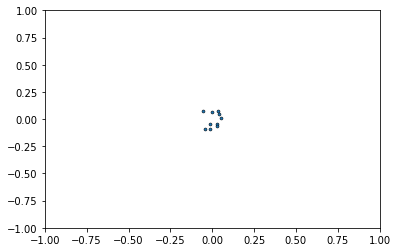

In [12]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim.to_jshtml())

In [13]:
anim.save('../animation/centered2.gif', writer='imagemagick', fps=10)
#visualizer.save_animation_to_gif(anim, name, 30)

In [9]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>